## Regresión Lineal

## $$h_\beta(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

- $h_\beta(x)$ es la respuesta
- $\beta_0$ es el intercepto
- $\beta_1$ coeficiente para $x_1$ (el primer feature)
- $\beta_n$ coeficiente para $x_n$ (el nth feature)

Los valores $\beta$ con llamados **model coefficients**:

- Estos valores se obtienen en el entramiento del algoritmo a través de la técnica Mínimos Cuadrados o **least squares criterion**.
- La línea de estimación que se encuentra reduce la suma de cuadrados del erro **sum of squared residuals**.
- Con los coeficientes se puede hacer la estimación.

![Estimating coefficients](https://raw.githubusercontent.com/justmarkham/DAT8/master/notebooks/images/estimating_coefficients.png)

In the diagram above:

- Los puntos negros son los valores observados **observed values** of x and y.
- La línea azul es la línea de estimación de Mínimos Cuadrados **least squares line**.
- Las líneas rojas son los errores **residuals**, es la distancia entre la línea de estimación y los valores observados.

### Regresión Lineal en práctica

Librerías necesarias

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model,cross_validation, feature_selection,preprocessing
import statsmodels.formula.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Regresión Lineal Simple

En los siguientes datos tenemos la altura y el peso de un conjunto de personas.

In [3]:
plt.style.use('ggplot')

In [4]:
sl_data = pd.read_csv('Mens_height_weight.csv')

Gráfico de dispersión de la altura y el peso

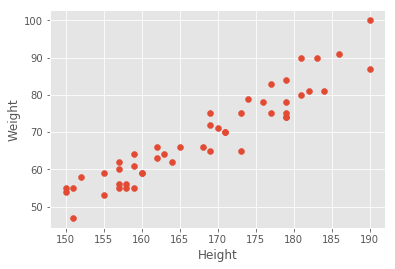

In [5]:
fig, ax = plt.subplots(1,1)  
ax.scatter(sl_data['Height'],sl_data['Weight'])
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()

In [6]:
sl_data.corr()

,Height,Weight
Height,1.000000,0.942603
Weight,0.942603,1.000000


Aplicamos la regresión lineal.

Weight: es la variable dependiente (X).

Height: es la variable independiente (Y).

In [7]:
# Create linear regression object
lm = linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(sl_data.Height[:,np.newaxis], sl_data.Weight)


print ('Intercept is ' + str(lm.intercept_))

print ('Coefficient value of the height is ' + str(lm.coef_))

Intercept is -99.2772096063
Coefficient value of the height is [ 1.00092142]


Graficamos la línea de regresión en la gráfica de dispersión

In [8]:
sl_data.Height[:, np.newaxis]
#sl_data.Height

array([[179],
       [177],
       [164],
       [181],
       [186],
       [162],
       [159],
       [155],
       [158],
       [151],
       [150],
       [157],
       [176],
       [163],
       [190],
       [169],
       [160],
       [171],
       [165],
       [182],
       [179],
       [157],
       [159],
       [151],
       [168],
       [184],
       [173],
       [159],
       [181],
       [190],
       [157],
       [169],
       [177],
       [171],
       [160],
       [173],
       [183],
       [169],
       [179],
       [150],
       [170],
       [179],
       [158],
       [155],
       [152],
       [157],
       [174],
       [162],
       [179]], dtype=int64)

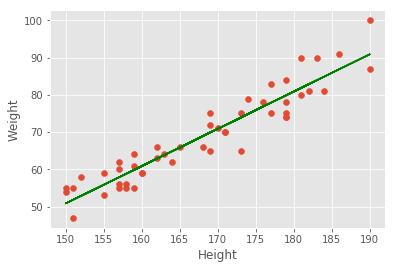

In [9]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(sl_data.Height,sl_data.Weight)
ax.plot(sl_data.Height,lm.predict(sl_data.Height[:, np.newaxis]), color = 'green')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()


## Regresión Múltiple

Usaremos datos de la NBA.

1. height = altura en pies
2. weight = peso en libras
3. success_field_goals = % de partidos exitosos (out of 100 attempted)
4. success_free_throws = % de tiros libres exitosos (out of 100 attempted)
5. avg_points_scored = promedio de puntos por partido jugado.

In [3]:
b_data = pd.read_csv('basketball.csv')

b_data.describe()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,6.587037,209.907407,0.449111,0.741852,11.790741
std,0.458894,30.265036,0.056551,0.100146,5.899257
min,5.700000,105.000000,0.291000,0.244000,2.800000
25%,6.225000,185.000000,0.415250,0.713000,8.150000
50%,6.650000,212.500000,0.443500,0.753500,10.750000
75%,6.900000,235.000000,0.483500,0.795250,13.600000
max,7.600000,263.000000,0.599000,0.900000,27.400000


In [85]:
b_data.corr()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
height,1.000000,0.834324,0.495546,-0.259271,-0.068906
weight,0.834324,1.000000,0.516051,-0.290159,-0.009844
success_field_goals,0.495546,0.516051,1.000000,-0.018570,0.338760
success_free_throws,-0.259271,-0.290159,-0.018570,1.000000,0.244852
avg_points_scored,-0.068906,-0.009844,0.338760,0.244852,1.000000


In [86]:
b_data.corr().unstack()

height               height                 1.000000
                     weight                 0.834324
                     success_field_goals    0.495546
                     success_free_throws   -0.259271
                     avg_points_scored     -0.068906
weight               height                 0.834324
                     weight                 1.000000
                     success_field_goals    0.516051
                     success_free_throws   -0.290159
                     avg_points_scored     -0.009844
success_field_goals  height                 0.495546
                     weight                 0.516051
                     success_field_goals    1.000000
                     success_free_throws   -0.018570
                     avg_points_scored      0.338760
success_free_throws  height                -0.259271
                     weight                -0.290159
                     success_field_goals   -0.018570
                     success_free_throws    1.

In [87]:
df_corr = b_data.corr().unstack()
df_corr = df_corr[df_corr<1]
df_corr.sort_values(ascending=False)
df_corr

height               weight                 0.834324
                     success_field_goals    0.495546
                     success_free_throws   -0.259271
                     avg_points_scored     -0.068906
weight               height                 0.834324
                     success_field_goals    0.516051
                     success_free_throws   -0.290159
                     avg_points_scored     -0.009844
success_field_goals  height                 0.495546
                     weight                 0.516051
                     success_free_throws   -0.018570
                     avg_points_scored      0.338760
success_free_throws  height                -0.259271
                     weight                -0.290159
                     success_field_goals   -0.018570
                     avg_points_scored      0.244852
avg_points_scored    height                -0.068906
                     weight                -0.009844
                     success_field_goals    0.

La variable que me interesa estimar es el promedio de puntos por partido jugado.

In [88]:
b_data.columns

Index(['height', 'weight', 'success_field_goals', 'success_free_throws',
       'avg_points_scored'],
      dtype='object')

In [89]:
b_data.columns[:-1]

Index(['height', 'weight', 'success_field_goals', 'success_free_throws'], dtype='object')

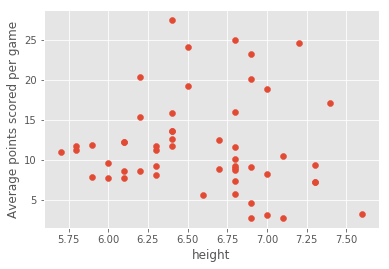

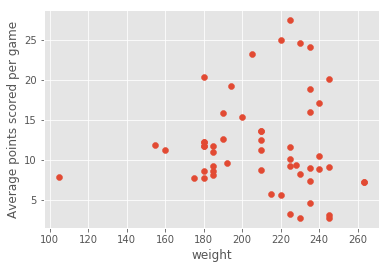

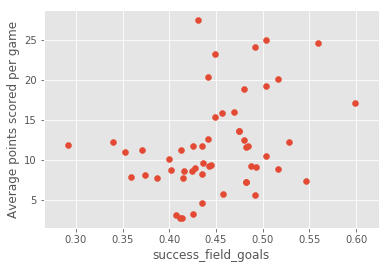

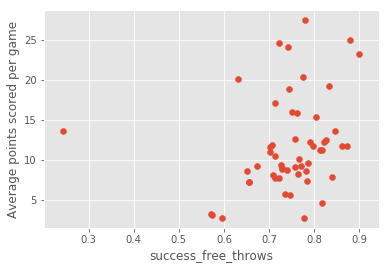

In [90]:
X_columns = b_data.columns[:-1]

for i in X_columns:
    fig, ax = plt.subplots(1, 1)  
    ax.scatter(b_data[i], b_data.avg_points_scored)
    ax.set_xlabel(i)
    ax.set_ylabel('Average points scored per game')
    plt.show()

Analizamos la correlación entre las variables

In [91]:
b_data.corr()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
height,1.000000,0.834324,0.495546,-0.259271,-0.068906
weight,0.834324,1.000000,0.516051,-0.290159,-0.009844
success_field_goals,0.495546,0.516051,1.000000,-0.018570,0.338760
success_free_throws,-0.259271,-0.290159,-0.018570,1.000000,0.244852
avg_points_scored,-0.068906,-0.009844,0.338760,0.244852,1.000000


Partimos los datos en entrenamiento y validación para evitar el sobreajuste.

In [92]:
X = b_data.values.copy() 
X[0:6,:]

array([[   6.8  ,  225.   ,    0.442,    0.672,    9.2  ],
       [   6.3  ,  180.   ,    0.435,    0.797,   11.7  ],
       [   6.4  ,  190.   ,    0.456,    0.761,   15.8  ],
       [   6.2  ,  180.   ,    0.416,    0.651,    8.6  ],
       [   6.9  ,  205.   ,    0.449,    0.9  ,   23.2  ],
       [   6.4  ,  225.   ,    0.431,    0.78 ,   27.4  ]])

In [93]:
X[0:6, :-1]

array([[   6.8  ,  225.   ,    0.442,    0.672],
       [   6.3  ,  180.   ,    0.435,    0.797],
       [   6.4  ,  190.   ,    0.456,    0.761],
       [   6.2  ,  180.   ,    0.416,    0.651],
       [   6.9  ,  205.   ,    0.449,    0.9  ],
       [   6.4  ,  225.   ,    0.431,    0.78 ]])

In [94]:
X_train, X_valid, y_train, y_valid = cross_validation.train_test_split( X[:, :-1], X[:, -1], train_size=0.80, random_state=666)

Generamos el modelo con la ayuda de la librería Statmodels

In [95]:
result = sm.OLS( y_train, add_constant(X_train) ).fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     3.495
Date:                Sat, 10 Jun 2017   Prob (F-statistic):             0.0159
Time:                        14:10:21   Log-Likelihood:                -129.43
No. Observations:                  43   AIC:                             268.9
Df Residuals:                      38   BIC:                             277.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.1747     19.921     -1.565      0.126     -71.504       9.154
x1             0.5555      3.548      0.157      0.876      -6.626       7.737
x2             0.0100      0.052      0.191      0.850      -0.096       0.116
x3            24.5625     19.030      1.291      0.205     -13.961      63.086
x4            35.4612     13.648      2.598      0.013       7.833      63.089
==============================================================================
Omnibus:                        7.315   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.301
Skew:                           0.903   Prob(JB):                       0.0428
Kurtosis:                       3.504   Cond. No.                     6.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Quitamos a las variables que no aportan al modelo.

In [96]:
X_train[0:9]

array([[   5.8  ,  180.   ,    0.425,    0.872],
       [   6.8  ,  235.   ,    0.546,    0.784],
       [   7.   ,  230.   ,    0.435,    0.764],
       [   6.8  ,  225.   ,    0.442,    0.672],
       [   6.3  ,  180.   ,    0.435,    0.797],
       [   7.3  ,  263.   ,    0.482,    0.655],
       [   6.8  ,  235.   ,    0.469,    0.75 ],
       [   6.9  ,  245.   ,    0.516,    0.632],
       [   7.3  ,  228.   ,    0.445,    0.726]])

In [97]:
X_train[0:9,3]

array([ 0.872,  0.784,  0.764,  0.672,  0.797,  0.655,  0.75 ,  0.632,
        0.726])

In [98]:
result_alternate = sm.OLS( y_train, add_constant(X_train[:,3]) ).fit()
result_alternate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     8.235
Date:                Sat, 10 Jun 2017   Prob (F-statistic):            0.00647
Time:                        14:10:21   Log-Likelihood:                -132.23
No. Observations:                  43   AIC:                             268.5
Df Residuals:                      41   BIC:                             272.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.2779      8.620     -1.424      0.162     -29.686       5.131
x1            32.6030     11.362      2.870      0.006       9.658      55.548
==============================================================================
Omnibus:                       10.580   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.379
Skew:                           1.171   Prob(JB):                      0.00557
Kurtosis:                       3.556   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Usaremos los datos de validación y medimos los modelos generados (all features) vs (selected features)

In [99]:
ypred = result.predict(add_constant(X_valid))
print (mse(ypred,y_valid))

67.6330067394


In [100]:
ypred_alternate = result_alternate.predict(add_constant(X_valid[:,3]))
print (mse(ypred_alternate,y_valid))


66.3805169718


Veamos la dispersión de el promedio de puntos por parttido ganado (real vs estimación del modelo del primer modelo)

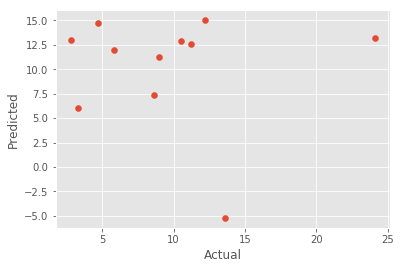

In [101]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

Veamos la dispersión de el promedio de puntos por parttido ganado (real vs estimación del modelo del segundo modelo)

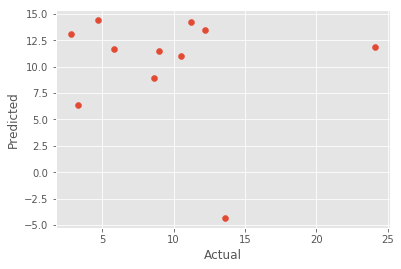

In [102]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypred_alternate)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

### Usaremos Scikit Learn para encontrar el modelo de regresión lineal

### Primer Modelo - All features

In [103]:
# Create linear regression object
lm = linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

print ('Intercepto es ' + str(lm.intercept_))

print ('Los coeficientes de regresión ' + str(lm.coef_))

Intercepto es -31.1747224261
Los coeficientes de regresión [  5.55504878e-01   9.98815193e-03   2.45625106e+01   3.54612031e+01]


Validamos el performance del modelo

In [104]:
ypred = lm.predict(X_valid)

mean_squared_error(ypred,y_valid)

67.633006739380193

### Transformaciones de Variables

In [105]:
X[0:5,:]

array([[   6.8  ,  225.   ,    0.442,    0.672,    9.2  ],
       [   6.3  ,  180.   ,    0.435,    0.797,   11.7  ],
       [   6.4  ,  190.   ,    0.456,    0.761,   15.8  ],
       [   6.2  ,  180.   ,    0.416,    0.651,    8.6  ],
       [   6.9  ,  205.   ,    0.449,    0.9  ,   23.2  ]])

In [106]:
transformations = {'x': lambda x: x, '1/x': lambda x: 1/x, 'x**2': lambda x: x**2,
 'x**3': lambda x: x**3, 'log(x)': lambda x: np.log(x)}
transformations

{'1/x': <function __main__.<lambda>>,
 'log(x)': <function __main__.<lambda>>,
 'x': <function __main__.<lambda>>,
 'x**2': <function __main__.<lambda>>,
 'x**3': <function __main__.<lambda>>}

In [107]:
from scipy import stats

for i in transformations:
    pearsonr_coef, pearsonr_p = stats.pearsonr(X[:, -1],transformations[i](X[:, 0]))
    print(i,pearsonr_coef, pearsonr_p)

x -0.0689058971259 0.620533814633
1/x 0.0534550064681 0.701055688011
x**2 -0.0765092671215 0.582403328745
x**3 -0.0839625644908 0.546091845387
log(x) -0.0612034412781 0.660197508717


In [108]:
from scipy import stats

for transformation in transformations:
    pearsonr_coef, pearsonr_p = stats.pearsonr(X[:, -1],transformations[transformation](X[:, 1]))
    print(transformation,pearsonr_coef, pearsonr_p)

x -0.00984353772875 0.943681050503
1/x -0.0389371940132 0.779830684383
x**2 -0.0322184442636 0.817100068591
x**3 -0.0521826416005 0.707849785896
log(x) 0.0144959645012 0.917140747223


In [109]:
from scipy import stats

for transformation in transformations:
    pearsonr_coef, pearsonr_p = stats.pearsonr(X[:, -1],transformations[transformation](X[:, 2]))
    print(transformation,pearsonr_coef, pearsonr_p)

x 0.338760223826 0.0122211799268
1/x -0.296369250137 0.0295517417018
x**2 0.350716163712 0.00932012976899
x**3 0.356840769512 0.00808023367946
log(x) 0.320604587622 0.0180987769519


In [110]:
from scipy import stats

for transformation in transformations:
    pearsonr_coef, pearsonr_p = stats.pearsonr(X[:, -1],transformations[transformation](X[:, 3]))
    print(transformation,pearsonr_coef, pearsonr_p)

x 0.244851691267 0.0743496522163
1/x -0.0930512536293 0.503343170855
x**2 0.292750316147 0.0316948243309
x**3 0.319545979092 0.0185052975622
log(x) 0.172652289864 0.21186869308


### Modelo con Transformaciones

In [111]:
X[:, 2]=X[:, 2]**3

In [112]:
X[:, 3]=X[:, 3]**3

In [113]:
X[0:5,:]

array([[  6.80000000e+00,   2.25000000e+02,   8.63508880e-02,
          3.03464448e-01,   9.20000000e+00],
       [  6.30000000e+00,   1.80000000e+02,   8.23128750e-02,
          5.06261573e-01,   1.17000000e+01],
       [  6.40000000e+00,   1.90000000e+02,   9.48188160e-02,
          4.40711081e-01,   1.58000000e+01],
       [  6.20000000e+00,   1.80000000e+02,   7.19912960e-02,
          2.75894451e-01,   8.60000000e+00],
       [  6.90000000e+00,   2.05000000e+02,   9.05188490e-02,
          7.29000000e-01,   2.32000000e+01]])

In [114]:
X_train, X_valid, y_train, y_valid = cross_validation.train_test_split( X[:, :-1], X[:, -1], train_size=0.80, random_state=666)

In [115]:
# Create linear regression object
lm_mod = linear_model.LinearRegression()

# Train the model using the training sets
lm_mod.fit(X_train, y_train)

print ('Intercepto es ' + str(lm_mod.intercept_) + '\n')

print ('Los coeficientes de regresión ' + str(lm_mod.coef_))

Intercepto es -2.9871043351

Los coeficientes de regresión [ -1.51047960e-01   1.25656614e-02   4.83928526e+01   2.06118397e+01]


In [116]:
ypredmod = lm_mod.predict(X_valid)

mean_squared_error(ypredmod,y_valid)

40.837313544726079

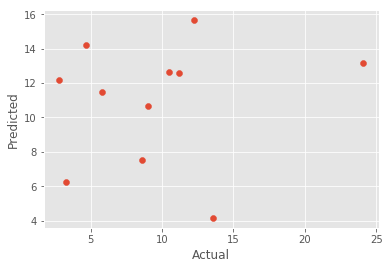

In [117]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypredmod)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [118]:
result_alternate2 = sm.OLS( y_train, add_constant(X_train) ).fit()
result_alternate2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     3.765
Date:                Sat, 10 Jun 2017   Prob (F-statistic):             0.0113
Time:                        14:10:24   Log-Likelihood:                -128.98
No. Observations:                  43   AIC:                             268.0
Df Residuals:                      38   BIC:                             276.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9871     17.408     -0.172      0.865     -38.227      32.253
x1            -0.1510      3.531     -0.043      0.966      -7.299       6.997
x2             0.0126      0.051      0.248      0.806      -0.090       0.115
x3            48.3929     28.681      1.687      0.100      -9.669     106.455
x4            20.6118      7.586      2.717      0.010       5.255      35.968
==============================================================================
Omnibus:                        7.434   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.274
Skew:                           0.869   Prob(JB):                       0.0434
Kurtosis:                       3.692   Cond. No.                     8.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Reducir el número de dimensiones (buscar componentes no relacionados)

In [119]:
X = b_data.values.copy() 

In [120]:
X[0:5,:]

array([[   6.8  ,  225.   ,    0.442,    0.672,    9.2  ],
       [   6.3  ,  180.   ,    0.435,    0.797,   11.7  ],
       [   6.4  ,  190.   ,    0.456,    0.761,   15.8  ],
       [   6.2  ,  180.   ,    0.416,    0.651,    8.6  ],
       [   6.9  ,  205.   ,    0.449,    0.9  ,   23.2  ]])

In [121]:
y_mean, y_std = X[:,-1].mean(), X[:,-1].std()
X_mean, X_std = X[:,:-1].mean(),X[:,:-1].std()

In [122]:
y = X[:,-1]
X = (X[:,:-1] - X_mean)/ X_std

In [123]:
X[0:5,]

array([[-0.52304511,  1.87353623, -0.59287767, -0.59035148],
       [-0.52853682,  1.37928252, -0.59295455, -0.58897856],
       [-0.52743848,  1.48911668, -0.5927239 , -0.58937396],
       [-0.52963516,  1.37928252, -0.59316324, -0.59058214],
       [-0.52194677,  1.65386792, -0.59280079, -0.58784727]])

In [124]:
y[0:5,]

array([  9.2,  11.7,  15.8,   8.6,  23.2])

In [125]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [126]:
hpc = PCA(n_components=4).fit(X)
hpc

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [127]:
hpc.explained_variance_ratio_

array([  9.99917574e-01,   6.99016677e-05,   1.01047841e-05,
         2.41910226e-06])

In [128]:
#Cumulative Variance explains
var1=np.cumsum(np.round(hpc.explained_variance_ratio_, decimals=4)*100)
var1

array([  99.99,  100.  ,  100.  ,  100.  ])

In [129]:
hpc = PCA(n_components=2).fit_transform(X)
hpc[0:5,]

array([[ -1.65785054e-01,   2.43798682e-04],
       [  3.28499518e-01,   1.00290625e-03],
       [  2.18659753e-01,   7.19305743e-04],
       [  3.28512074e-01,  -7.80377325e-05],
       [  5.38539182e-02,   4.09482983e-03]])

In [130]:
X_train, X_valid, y_train, y_valid = cross_validation.train_test_split( hpc, y, train_size=0.80,random_state=123)

In [131]:
# Create linear regression object
lm = linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

print ('Intercept is ' + str(lm.intercept_) + '\n')

print ('Coefficients' + str(lm.coef_))

Intercept is 12.6305238056

Coefficients[  -1.34461036 -314.95617228]


In [132]:
ypred = lm.predict(X_valid)

mean_squared_error(ypred,y_valid)

35.585045339581136

In [133]:
ypred[0:5,]

array([ 12.43159011,  13.17381149,  13.25660146,  13.36713113,  12.85792264])

In [134]:
y_valid[0:5,]

array([ 11.2,   5.6,   3.2,   9. ,   8.6])

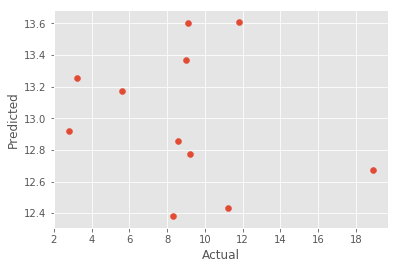

In [135]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [136]:
hpc = PCA(n_components=3).fit_transform(X)
hpc[0:5,]

array([[ -1.65785054e-01,   2.43798682e-04,   6.27761353e-04],
       [  3.28499518e-01,   1.00290625e-03,  -3.17270593e-04],
       [  2.18659753e-01,   7.19305743e-04,  -3.95518750e-05],
       [  3.28512074e-01,  -7.80377325e-05,   1.31146198e-03],
       [  5.38539182e-02,   4.09482983e-03,  -1.72574258e-03]])

In [137]:
X_train, X_valid, y_train, y_valid = cross_validation.train_test_split( hpc,y, train_size=0.80,random_state=123)

In [138]:
# Create linear regression object
lm = linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

print ('Intercept is ' + str(lm.intercept_) + '\n')

print ('Coefficient value of the height is ' + str(lm.coef_))

Intercept is 12.6835280328

Coefficient value of the height is [ -1.15725890e+00  -3.36980802e+02  -1.57155044e+03]


In [139]:
ypred = lm.predict(X_valid)

mean_squared_error(ypred,y_valid)

35.864159559219019

In [140]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_valid, ypred))
print('MSE:', metrics.mean_squared_error(y_valid, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, ypred)))

MAE: 5.43171719322
MSE: 35.8641595592
RMSE: 5.98866926447


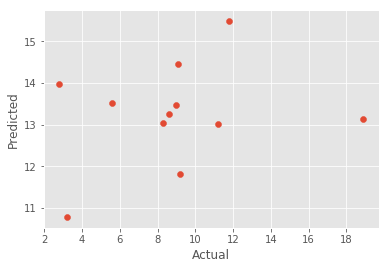

In [141]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

###  Cost function

El objetivo es estimar los parámetros $\beta$ que minimicen la suma de cuadrados

## $$J(\beta_0, \beta_1)=\frac{1}{2n}\sum_{i=1}^n (h_\beta(x_i)-y_i)^2$$

### Gradiente Descendente Estocástico

In [142]:
X_train[0:5,:]

array([[ -1.65728222e-01,  -4.16705836e-03,  -4.89841232e-04],
       [ -3.85450691e-01,  -1.41652689e-03,   8.07420498e-04],
       [ -5.83191149e-01,   4.53111336e-04,   4.08688191e-04],
       [ -2.75622603e-01,  -7.61475078e-05,  -1.04768358e-03],
       [  2.73586601e-01,   3.01690399e-04,   6.77772917e-04]])

In [143]:
# import
from sklearn.linear_model import SGDRegressor

In [144]:
# Initialize
linreg2 = SGDRegressor(fit_intercept=False, n_iter=300)

In [145]:
# Fit
linreg2.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=False, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=300, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [146]:
linreg2.coef_

array([ 1.08663379, -0.00577605, -0.0247087 ])

In [147]:
ypredgd = linreg2.predict(X_valid)

### Comparación de modelos (OLS vs Gradiente Descendente)

In [148]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_valid, ypredgd))
print('MSE:', metrics.mean_squared_error(y_valid, ypredgd))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, ypredgd)))

MAE: 8.98598755979
MSE: 97.7392726601
RMSE: 9.88631744686


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.


### Probaremos el Gradiente Descendente con variables naturales

In [149]:
X = b_data.values.copy()
X[0:5,:]

array([[   6.8  ,  225.   ,    0.442,    0.672,    9.2  ],
       [   6.3  ,  180.   ,    0.435,    0.797,   11.7  ],
       [   6.4  ,  190.   ,    0.456,    0.761,   15.8  ],
       [   6.2  ,  180.   ,    0.416,    0.651,    8.6  ],
       [   6.9  ,  205.   ,    0.449,    0.9  ,   23.2  ]])

In [151]:
X_train, X_valid, y_train, y_valid = cross_validation.train_test_split( X[:, :-1], X[:, -1], train_size=0.80, random_state=123)

In [160]:
linreg2 = SGDRegressor(fit_intercept=False, n_iter=1000000000, alpha=0.0000000001)

In [ ]:
linreg2.fit(X_train, y_train)

In [154]:
ypredgd2 = linreg2.predict(X_valid)

In [155]:
print('MAE:', metrics.mean_absolute_error(y_valid, ypredgd2))
print('MSE:', metrics.mean_squared_error(y_valid, ypredgd2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, ypredgd2)))

MAE: 42.8903925052
MSE: 1880.87456263
RMSE: 43.3690507463


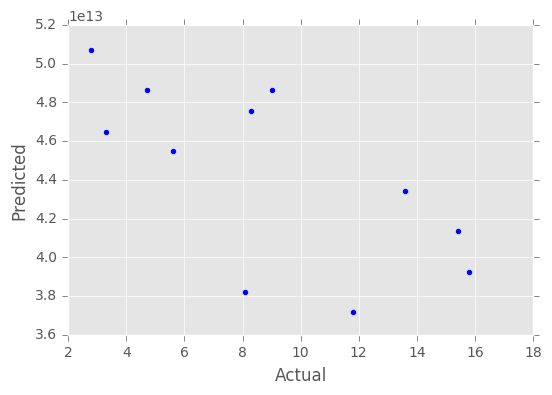

In [355]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypredgd2)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

### Regression Trees

In [4]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(criterion='mse',max_depth=3,min_samples_split=5,random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [5]:
X = b_data.values

In [6]:
features=b_data.columns
features=features[:-1]

In [8]:
X[0:5,:]

array([[   6.8  ,  225.   ,    0.442,    0.672,    9.2  ],
       [   6.3  ,  180.   ,    0.435,    0.797,   11.7  ],
       [   6.4  ,  190.   ,    0.456,    0.761,   15.8  ],
       [   6.2  ,  180.   ,    0.416,    0.651,    8.6  ],
       [   6.9  ,  205.   ,    0.449,    0.9  ,   23.2  ]])

### Left out validation

In [7]:
X_train, X_valid, y_train, y_valid = cross_validation.train_test_split( X[:, :-1], X[:, -1], train_size=0.80, random_state=123)

In [8]:
treereg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [9]:
ypredtree1 = treereg.predict(X_valid)

In [10]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_valid, ypredtree1))
print('MSE:', metrics.mean_squared_error(y_valid, ypredtree1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, ypredtree1)))

MAE: 2.9202020202
MSE: 14.3568992393
RMSE: 3.78904991249


In [14]:
ypredtree2 = treereg.predict(X_train)

In [15]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_train, ypredtree2))
print('MSE:', metrics.mean_squared_error(y_train, ypredtree2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, ypredtree2)))

MAE: 2.88535745047
MSE: 17.2292291128
RMSE: 4.15081065731


### Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(treereg, X_valid, y_valid, cv=10, scoring='neg_mean_squared_error')

In [31]:
np.mean(np.sqrt(-scores))

5.0210789824413506

In [32]:
-scores

array([  46.625     ,   48.8445679 ,    2.29306122,    3.88653061,
        199.75111111,    5.35591837,   37.21      ,    2.84163265,
         54.59567901,    1.65306122])

In [33]:
# list of values to try
max_depth_range = range(1, 10)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X_valid, y_valid, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

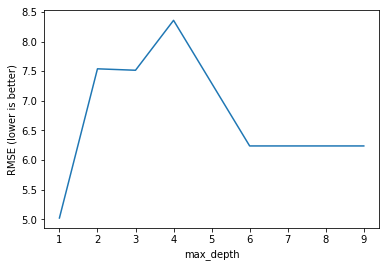

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [41]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(criterion='mse',max_depth=2,random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [42]:
treereg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [43]:
ypredtree3 = treereg.predict(X_valid)

In [44]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_valid, ypredtree3))
print('MSE:', metrics.mean_squared_error(y_valid, ypredtree3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, ypredtree3)))

MAE: 3.01461038961
MSE: 15.2037983276
RMSE: 3.89920483273


In [45]:
treereg.feature_importances_

array([ 0.12517541,  0.        ,  0.51285649,  0.3619681 ])

In [46]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':features, 'importance':treereg.feature_importances_})

,feature,importance
0,height,0.125175
1,weight,0.000000
2,success_field_goals,0.512856
3,success_free_throws,0.361968
